In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
project_path = "/content/drive/My Drive/DataScienceProjects/spotify-song-analysis"
data_path = f"{project_path}/data"

In [64]:
df = pd.read_csv(f"{data_path}/songs_normalize.csv")

In [65]:
df = df.rename(columns={'duration_ms': 'duration_sec', 'key': 'musical_key'})

In [67]:
df['duration_sec'] = df['duration_sec'] / 1000

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_sec      2000 non-null   float64
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   musical_key       2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [70]:
summary = pd.DataFrame({
    'Mean': df[['tempo', 'energy', 'valence']].mean(),
    'Median': df[['tempo', 'energy', 'valence']].median(),
    'Mode': df[['tempo', 'energy', 'valence']].mode().iloc[0],
    'Std Dev': df[['tempo', 'energy', 'valence']].std(),
    'Min': df[['tempo', 'energy', 'valence']].min(),
    'Max': df[['tempo', 'energy', 'valence']].max()
})
summary


              tempo    energy   valence
Mean     120.122558  0.720366  0.551690
Median   120.021500  0.736000  0.557500
Mode     140.022000  0.783000  0.418000
Std Dev   26.967112  0.152745  0.220864
Min       60.019000  0.054900  0.038100
Max      210.851000  0.999000  0.973000


In [72]:
corr = sp.pearsonr(df['popularity'], df['energy'])
print("Correlation Coefficient: ", round(corr[0], 2))

Correlation Coefficient:  -0.01


Correlation Coefficient:  -0.01
Correlation Coefficient = -0.01 - this tells us that there is a no meaningful linear relationship between popularity and energy - as one increases, the other does not increase or decrease - No Correlation.

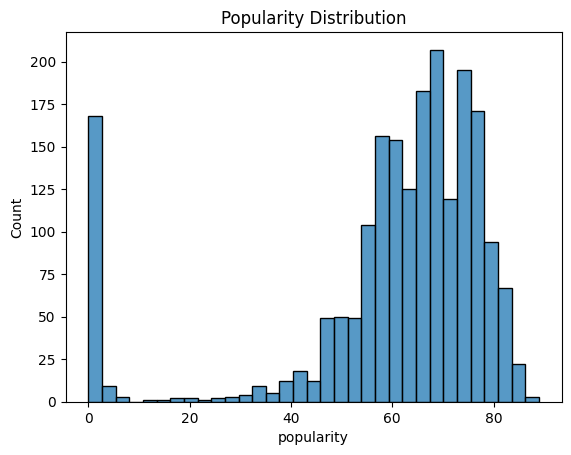

In [73]:
sns.histplot(df['popularity'])
plt.title('Popularity Distribution')
plt.show()

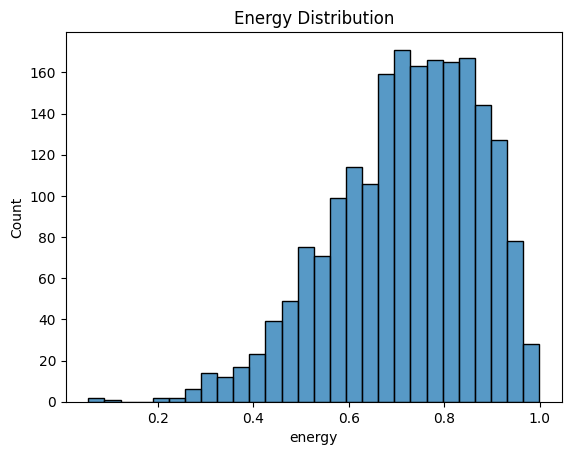

In [74]:
sns.histplot(df['energy'])
plt.title('Energy Distribution')
plt.show()

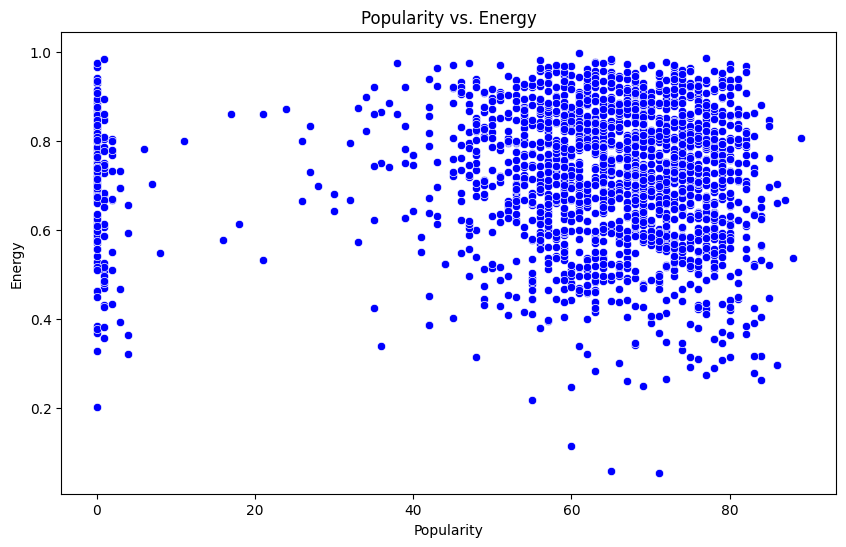

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='energy', data=df, color='blue')
plt.title('Popularity vs. Energy')
plt.xlabel('Popularity')
plt.ylabel('Energy')
plt.show()

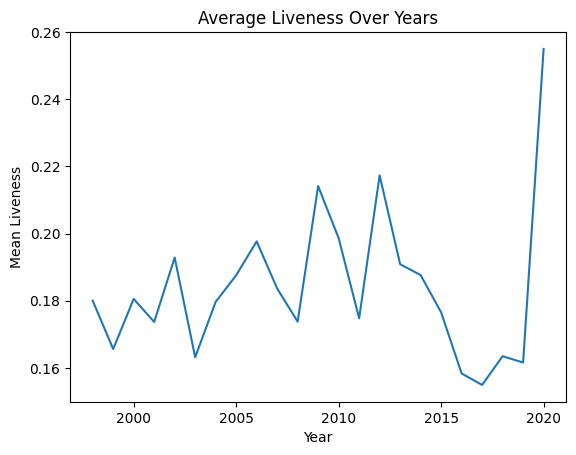

In [76]:
df.groupby('year')['liveness'].mean().plot(kind='line')
plt.title('Average Liveness Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Liveness')
plt.show()